In [2]:
!pip install transformers


# Nandu Vasudevan
CB.EN.P2DSC22008

In [3]:
!pip install tokenizers


In [4]:
BASE_DIR = ''
WORKING_DIR = ''

In [5]:
import os


In [6]:
with open(os.path.join(BASE_DIR, '/kaggle/input/flickr8k/captions.txt'), 'r') as f:
    next(f)
    captions_doc = f.read()

In [7]:
import numpy as np
from tqdm.notebook import tqdm

In [8]:
# create mapping of image to captions
mapping = {}
# process lines
for line in tqdm(captions_doc.split('\n')):
    # split the line by comma(,)
    tokens = line.split(',')
    if len(line) < 2:
        continue
    image_id, caption = tokens[0], tokens[1:]
    # remove extension from image ID
    image_id = image_id.split('.')[0]
    # convert caption list to string
    caption = " ".join(caption)
    # create list if needed
    if image_id not in mapping:
        mapping[image_id] = []
    # store the caption
    mapping[image_id].append(caption)

  0%|          | 0/40456 [00:00<?, ?it/s]

In [9]:
len(mapping)

8091

In [10]:
def clean(mapping):
    for key, captions in mapping.items():
        for i in range(len(captions)):
            # take one caption at a time
            caption = captions[i]
            # preprocessing steps
            # convert to lowercase
            caption = caption.lower()
            # delete digits, special chars, etc.,
            caption = caption.replace('[^A-Za-z]', '')
            # delete additional spaces
            caption = caption.replace('\s+', ' ')
            # add start and end tags to the caption
            caption = 'startseq ' + " ".join([word for word in caption.split() if len(word)>1]) + ' endseq'
            captions[i] = caption

In [11]:
# before preprocess of text
mapping

{'1000268201_693b08cb0e': ['A child in a pink dress is climbing up a set of stairs in an entry way .',
  'A girl going into a wooden building .',
  'A little girl climbing into a wooden playhouse .',
  'A little girl climbing the stairs to her playhouse .',
  'A little girl in a pink dress going into a wooden cabin .'],
 '1001773457_577c3a7d70': ['A black dog and a spotted dog are fighting',
  'A black dog and a tri-colored dog playing with each other on the road .',
  'A black dog and a white dog with brown spots are staring at each other in the street .',
  'Two dogs of different breeds looking at each other on the road .',
  'Two dogs on pavement moving toward each other .'],
 '1002674143_1b742ab4b8': ['A little girl covered in paint sits in front of a painted rainbow with her hands in a bowl .',
  'A little girl is sitting in front of a large painted rainbow .',
  'A small girl in the grass plays with fingerpaints in front of a white canvas with a rainbow on it .',
  'There is a gi

In [12]:
# preprocess the text
clean(mapping)

In [13]:
# after preprocess of text
mapping

{'1000268201_693b08cb0e': ['startseq child in pink dress is climbing up set of stairs in an entry way endseq',
  'startseq girl going into wooden building endseq',
  'startseq little girl climbing into wooden playhouse endseq',
  'startseq little girl climbing the stairs to her playhouse endseq',
  'startseq little girl in pink dress going into wooden cabin endseq'],
 '1001773457_577c3a7d70': ['startseq black dog and spotted dog are fighting endseq',
  'startseq black dog and tri-colored dog playing with each other on the road endseq',
  'startseq black dog and white dog with brown spots are staring at each other in the street endseq',
  'startseq two dogs of different breeds looking at each other on the road endseq',
  'startseq two dogs on pavement moving toward each other endseq'],
 '1002674143_1b742ab4b8': ['startseq little girl covered in paint sits in front of painted rainbow with her hands in bowl endseq',
  'startseq little girl is sitting in front of large painted rainbow ends

In [14]:
all_captions = []
for key in mapping:
    for caption in mapping[key]:
        all_captions.append(caption)

In [15]:
len(all_captions)

40455

In [16]:
all_captions[:10]

['startseq child in pink dress is climbing up set of stairs in an entry way endseq',
 'startseq girl going into wooden building endseq',
 'startseq little girl climbing into wooden playhouse endseq',
 'startseq little girl climbing the stairs to her playhouse endseq',
 'startseq little girl in pink dress going into wooden cabin endseq',
 'startseq black dog and spotted dog are fighting endseq',
 'startseq black dog and tri-colored dog playing with each other on the road endseq',
 'startseq black dog and white dog with brown spots are staring at each other in the street endseq',
 'startseq two dogs of different breeds looking at each other on the road endseq',
 'startseq two dogs on pavement moving toward each other endseq']

In [17]:
import tensorflow as tf
from transformers import BertTokenizer, TFBertModel
import pandas as pd
import numpy as np

2024-02-04 06:18:53.266210: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-04 06:18:53.266317: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-04 06:18:53.442061: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [18]:
# tokenize the text
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(all_captions)
vocab_size = len(tokenizer.word_index)

In [19]:
all_tokens = tokenizer.word_index.keys()
print(all_tokens)


dict_keys(['startseq', 'endseq', 'in', 'the', 'on', 'is', 'and', 'dog', 'with', 'man', 'of', 'two', 'white', 'black', 'boy', 'are', 'woman', 'girl', 'to', 'wearing', 'at', 'people', 'water', 'red', 'young', 'brown', 'an', 'his', 'blue', 'dogs', 'running', 'through', 'playing', 'while', 'shirt', 'down', 'standing', 'ball', 'little', 'grass', 'snow', 'child', 'person', 'jumping', 'over', 'three', 'front', 'sitting', 'holding', 'up', 'field', 'small', 'by', 'a', 'large', 'green', 'one', 'group', 'yellow', 'her', 'walking', 'children', 'men', 'into', 'air', 'beach', 'near', 'mouth', 'jumps', 'another', 'for', 'street', 'runs', 'its', 'from', 'riding', 'stands', 'as', 'bike', 'girls', 'outside', 'other', 'off', 'out', 'rock', 'next', 'play', 'orange', 'looking', 'pink', 'player', 'camera', 'their', 'pool', 'hat', 'jacket', 'boys', 'women', 'around', 'behind', 'some', 'background', 'dirt', 'toy', 'soccer', 'sits', 'dressed', 'has', 'wall', 'mountain', 'walks', 'crowd', 'along', 'plays', 'sta

In [24]:
all_tokens_list = list(all_tokens)


In [27]:
all_tokens_list[8404]

'fairgrounds'

In [28]:
all_tokens_list[1]

'endseq'

In [29]:
vocab_size

8484

In [30]:
len(all_tokens_list)

8484

In [31]:
# get maximum length of the caption available
max_length = max(len(caption.split()) for caption in all_captions)
max_length

35

In [32]:
from transformers import TFBertModel
import tensorflow as tf

# Load the pre-trained BERT model
model = TFBertModel.from_pretrained("bert-base-multilingual-cased")




config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

# PREMJITH SER METHOD

In [33]:


# Convert the tokens into input tensors
input_ids = tokenizer.texts_to_sequences([all_tokens_list[:5000]])
input_ids = tf.keras.preprocessing.sequence.pad_sequences(input_ids, padding='post')

# Convert the input tensors into TensorFlow tensors
input_ids = tf.constant(input_ids)

# Get the word embeddings
outputs = model(input_ids)
word_embeddings = outputs.last_hidden_state




In [34]:
word_embeddings.shape

TensorShape([1, 5000, 768])

In [35]:

# Convert the tokens into input tensors
input_ids = tokenizer.texts_to_sequences([all_tokens_list[5000:10000]])
input_ids = tf.keras.preprocessing.sequence.pad_sequences(input_ids, padding='post')

# Convert the input tensors into TensorFlow tensors
input_ids = tf.constant(input_ids)

# Get the word embeddings
outputs = model(input_ids)
word_embeddings1 = outputs.last_hidden_state


In [36]:
word_embeddings1.shape

TensorShape([1, 3484, 768])

In [30]:

# Convert the tokens into input tensors
input_ids = tokenizer.texts_to_sequences([all_tokens_list[10000:15000]])
input_ids = tf.keras.preprocessing.sequence.pad_sequences(input_ids, padding='post')

# Convert the input tensors into TensorFlow tensors
input_ids = tf.constant(input_ids)

# Get the word embeddings
outputs = model(input_ids)
word_embeddings2 = outputs.last_hidden_state


In [31]:

# Convert the tokens into input tensors
input_ids = tokenizer.texts_to_sequences([all_tokens_list[15000:]])
input_ids = tf.keras.preprocessing.sequence.pad_sequences(input_ids, padding='post')

# Convert the input tensors into TensorFlow tensors
input_ids = tf.constant(input_ids)

# Get the word embeddings
outputs = model(input_ids)
word_embeddings3 = outputs.last_hidden_state


In [37]:
print(word_embeddings.shape)


(1, 5000, 768)


In [38]:
print(word_embeddings1.shape)

(1, 3484, 768)


In [34]:
print(word_embeddings2.shape)

(1, 5000, 768)


In [35]:
print(word_embeddings3.shape)

(1, 4882, 768)


In [39]:
import tensorflow as tf

combined_embeddings = tf.concat([word_embeddings, word_embeddings1], axis=1)
print(combined_embeddings.shape)


(1, 8484, 768)


In [40]:
Bert_embeddings=combined_embeddings

In [41]:
import pandas as pd

# Convert the combined_embeddings tensor to a DataFrame
df = pd.DataFrame(Bert_embeddings.numpy().squeeze())

# Save DataFrame to CSV
#df.to_csv('Bert_embeddings.csv', index=False)

# Save DataFrame to text file
#df.to_csv('Bert_embeddings.txt', sep='\t', index=False)


In [42]:
import numpy as np

# Assume df is your DataFrame with 0-767 columns

# Convert DataFrame rows to a matrix using to_numpy()
matrix = df.to_numpy()

# Alternatively, convert DataFrame rows to a matrix using values attribute
matrix = df.values

# Display the matrix shape
print(matrix.shape)


(8484, 768)


In [43]:
df[0][0]

0.028022654

In [41]:
# Print the first row
first_row = matrix[0:2]
print(first_row)

[[ 0.02802265  0.15658526  0.19575551 ...  0.14483659  0.23729144

  -0.10417392]

 [-0.21991348 -0.10792994  0.640221   ...  0.35006735  0.27105704

  -0.31085247]]


In [42]:
first_row.shape

(2, 768)

# TAKING IMAGES

In [44]:
import os
import pickle
import numpy as np
from tqdm.notebook import tqdm

from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.layers import Input, Dense, LSTM, Embedding, Dropout, add

In [45]:
import urllib.request
import zipfile

# Download the zip file from the GitHub repository
url = "https://github.com/jbrownlee/Datasets/releases/download/Flickr8k/Flickr8k_Dataset.zip"
urllib.request.urlretrieve(url, "file.zip")

# Extract the contents of the zip file
with zipfile.ZipFile("file.zip", "r") as zip_ref:
    zip_ref.extractall("/content/flickr8k")

In [47]:
BASE_DIR = '/kaggle/input/flickr8k'
WORKING_DIR = ''

In [48]:
import tensorflow as tf

from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model

In [66]:
IMG_SHAPE=(224,224,3)
base_model = tf.keras.applications.ResNet50(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

In [67]:
base_model.trainable = False

In [69]:
from tensorflow.keras.layers import GlobalAveragePooling2D
# Add Global Average Pooling layer
global_average_layer = GlobalAveragePooling2D()(base_model.output)

# Create the final model
model = Model(inputs=base_model.input, outputs=global_average_layer)

# Summarize the model
print(model.summary())

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_5[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                        

In [50]:
import matplotlib.pyplot as plt
import torch
import torchvision

from torch import nn
from torchvision import transforms

In [54]:
# 1. Get pretrained weights for ViT-Base
pretrained_vit_weights = torchvision.models.ViT_B_16_Weights.DEFAULT

# 2. Setup a ViT model instance with pretrained weights
pretrained_vit = torchvision.models.vit_b_16(weights=pretrained_vit_weights)

In [ ]:
pip install torchinfo

In [55]:
import torch
import torch.nn as nn
import torchvision
from torchinfo import summary

# 1. Get pretrained weights for ViT-Base
pretrained_vit_weights = torchvision.models.ViT_B_16_Weights.DEFAULT

# 2. Setup a ViT model instance with pretrained weights
pretrained_vit = torchvision.models.vit_b_16(weights=pretrained_vit_weights)

# 3. Freeze the base parameters
for parameter in pretrained_vit.parameters():
    parameter.requires_grad = True

# 4. Remove the classification head (Linear layer)
pretrained_vit.heads = nn.Identity()

# 5. Verify the modified model using torchinfo
summary(model=pretrained_vit,
        input_size=(1, 3, 224, 224),  # Example input size
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)


Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
VisionTransformer (VisionTransformer)                        [1, 3, 224, 224]     [1, 768]             768                  True
├─Conv2d (conv_proj)                                         [1, 3, 224, 224]     [1, 768, 14, 14]     590,592              True
├─Encoder (encoder)                                          [1, 197, 768]        [1, 197, 768]        151,296              True
│    └─Dropout (dropout)                                     [1, 197, 768]        [1, 197, 768]        --                   --
│    └─Sequential (layers)                                   [1, 197, 768]        [1, 197, 768]        --                   True
│    │    └─EncoderBlock (encoder_layer_0)                   [1, 197, 768]        [1, 197, 768]        7,087,872            True
│    │    └─EncoderBlock (encoder_layer_1)                   [1, 197, 768]        [1, 197, 768

In [56]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [70]:
import os
from PIL import Image
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from tqdm import tqdm
import numpy as np

# Assuming 'pretrained_vit' is the modified ViT model without the classification head

# Set the model to evaluation mode
pretrained_vit.eval()

# Define the transformation for the images
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# Custom dataset for feature extraction
class FeatureExtractionDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.image_paths = [os.path.join(root_dir, img_name) for img_name in os.listdir(root_dir)]

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert('RGB')

        if self.transform:
            image = self.transform(image)

        return image, img_path  # Return image and path as identifiers

# Load the images using the custom dataset
feature_extraction_dataset = FeatureExtractionDataset('/content/flickr8k/Flicker8k_Dataset', transform=transform)
data_loader = DataLoader(feature_extraction_dataset, batch_size=1, shuffle=False)

# Create a dictionary to store the features
features = {}

with torch.no_grad():
    for images, paths in tqdm(data_loader, desc="Extracting features"):
        images = images.to(device)  # Move images to the same device as the model
        features_batch = pretrained_vit(images)

        for i in range(len(paths)):
            image_path = paths[i]
            # get image ID
            image_id = os.path.splitext(os.path.basename(image_path))[0]
            feature = features_batch[i].cpu().numpy().reshape(1, 768)  # Explicitly reshape the feature
            features[image_id] = feature.astype(np.ndarray)

# Now, 'features' dictionary contains the extracted features for each image with image names as keys


Extracting features: 100%|██████████| 8091/8091 [02:25<00:00, 55.80it/s]


In [71]:
feature.shape

(1, 768)

In [72]:
len(features)

8091

In [58]:
# Print all items in the features dictionary
#for key, value in features.items():
#    print(key, ":", value)


In [76]:
type(feature)

numpy.ndarray

In [59]:
# Print all items in the features dictionary with their shapes
#for key, value in features.items():
#   print(key, ":", value.shape)


COnvert numpy values to tensor


In [60]:
#import tensorflow as tf

# Convert all values to TensorFlow tensors
#features_tf = {key: tf.convert_to_tensor(value, dtype=tf.float32) for key, value in features.items()}

# Print all items in the new features dictionary
#for key, value in features_tf.items():
    #print(key, ":", value)


In [87]:
features=features_tf
type(features)

dict

In [90]:
feature.shape

(1, 768)

old code

In [70]:
# extract features from image
features = {}
directory = os.path.join(BASE_DIR, '/kaggle/input/flickr8k/Images')

for img_name in tqdm(os.listdir(directory)):
    # load the image from file
    img_path = directory + '/' + img_name
    image = load_img(img_path, target_size=(224, 224))
    # convert image pixels to numpy array
    image = img_to_array(image)
    # reshape data for model
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    # preprocess image for vgg
    image = preprocess_input(image)
    # extract features
    feature = model.predict(image, verbose=0)
    # get image ID
    image_id = img_name.split('.')[0]
    # store feature
    features[image_id] = feature

  0%|          | 0/8091 [00:00<?, ?it/s]

In [71]:
feature.shape

(1, 2048)

In [72]:
len(features)

8091

In [73]:
# Print all items in the features dictionary
#for key, value in features.items():
#    print(key, ":", value)


In [74]:
type(feature)

numpy.ndarray

In [ ]:
# store features in pickle
#pickle.dump(features, open(os.path.join(WORKING_DIR, 'featuresdensenet121.pkl'), 'wb'))

In [ ]:
# load features from pickle
#with open(os.path.join(WORKING_DIR, 'features.pkl'), 'rb') as f:
    #features = pickle.load(f)

# Train Test Split

In [75]:
image_ids = list(mapping.keys())
split = int(len(image_ids) * 0.90)
train = image_ids[:split]
test = image_ids[split:]

# data generator

In [76]:
# create data generator to get data in batch (avoids session crash)
def data_generator(data_keys, mapping, features, tokenizer, max_length, vocab_size, batch_size):
    # loop over images
    X1, X2, y = list(), list(), list()
    n = 0
    while 1:
        for key in data_keys:
            n += 1
            captions = mapping[key]
            # process each caption
            for caption in captions:
                # encode the sequence
                seq = tokenizer.texts_to_sequences([caption])[0]
                # split the sequence into X, y pairs
                for i in range(1, len(seq)):
                    # split into input and output pairs
                    in_seq, out_seq = seq[:i], seq[i]
                    # pad input sequence
                    in_seq = pad_sequences([in_seq], maxlen=max_length)[0]
                    # encode output sequence
                    out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]

                    # store the sequences
                    X1.append(features[key][0])
                    X2.append(in_seq)
                    y.append(out_seq)
            if n == batch_size:
                X1, X2, y = np.array(X1), np.array(X2), np.array(y)
                yield [X1, X2], y
                X1, X2, y = list(), list(), list()
                n = 0

new DATA GENERATOR

# Model Creation

In [77]:
embedding_matrix=matrix
matrix.shape



(8484, 768)

In [78]:
vocab_size=vocab_size
vocab_size

8484

In [79]:
embedding_matrix.shape[1]

768

In [80]:

max_length

35

In [ ]:
embedding_matrix=combined_embeddings

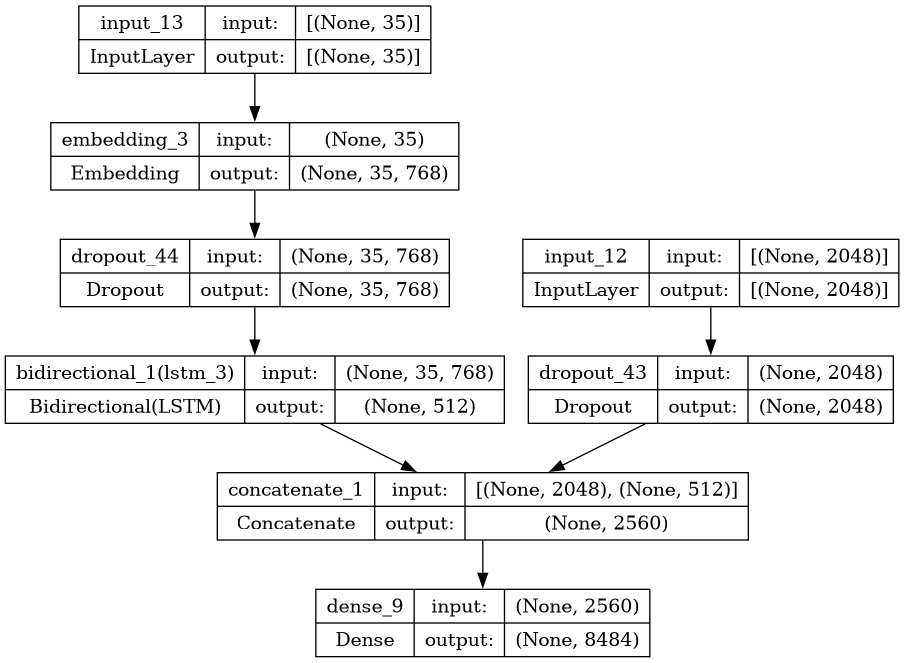

In [84]:
from tensorflow.keras.layers import Add, Dot, Concatenate, Activation, Reshape,Bidirectional
from tensorflow.keras.initializers import Constant




# Define the embedding layer with the pre-trained embedding matrix
embedding_layer = Embedding(
    input_dim=vocab_size,
    output_dim=embedding_matrix.shape[1],
    embeddings_initializer=Constant(embedding_matrix),
    input_length=max_length,
    mask_zero=True
)

# Encoder model
# Image feature layers
inputs1 = Input(shape=(2048,))
fe1 = Dropout(0.4)(inputs1)
#fe2 = Dense(256, activation='relu')(fe1)

# Sequence feature layers
inputs2 = Input(shape=(max_length,))
se1 = embedding_layer(inputs2)


se2 = Dropout(0.4)(se1)
se3 = Bidirectional(LSTM(256))(se2)

# Decoder model
#decoder1 = Add()([fe2, se3])
decoder1 = Concatenate()([fe1, se3])  # Concatenate instead of Add
#decoder2 = Dense(256, activation='relu')(decoder1)
outputs = Dense(vocab_size, activation='softmax')(decoder1)

model = Model(inputs=[inputs1, inputs2], outputs=outputs)
model.compile(loss='categorical_crossentropy', optimizer='adam')

# Plot the model
plot_model(model, show_shapes=True)


# TRAIN THE MODEL

In [85]:
# train the model
epochs = 20
batch_size = 32
steps = len(train) // batch_size

for i in range(epochs):
    # create data generator
    generator = data_generator(train, mapping, features, tokenizer, max_length, vocab_size, batch_size)
    # fit for one epoch
    model.fit(generator, epochs=1, steps_per_epoch=steps, verbose=1)

I0000 00:00:1707030993.731368     130 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


227/227 [==============================] - 81s 358ms/step - loss: 2.2554


In [120]:

# save the model
model.save(WORKING_DIR+'/best_model.h5')

In [86]:


# save the model
model.save(BASE_DIR+'/best_model.h5')

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


OSError: [Errno 30] Unable to synchronously create file (unable to open file: name = '/kaggle/input/flickr8k/best_model.h5', errno = 30, error message = 'Read-only file system', flags = 13, o_flags = 242)

In [121]:
# Get the size of the model output
output_shape = model.output_shape
print("Model Output Shape:", output_shape)

Model Output Shape: (None, 19882)


# Generate Captions for the Image

In [87]:
def idx_to_word(integer, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == integer:
            return word
    return None

In [88]:
# generate caption for an image
def predict_caption(model, image, tokenizer, max_length):
    # add start tag for generation process
    in_text = 'startseq'
    # iterate over the max length of sequence
    for i in range(max_length):
        # encode input sequence
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        # pad the sequence
        sequence = pad_sequences([sequence], max_length)
        # predict next word
        yhat = model.predict([image, sequence], verbose=0)
        # get index with high probability
        yhat = np.argmax(yhat)
        # convert index to word
        word = idx_to_word(yhat, tokenizer)
        # stop if word not found
        if word is None:
            break
        # append word as input for generating next word
        in_text += " " + word
        # stop if we reach end tag
        if word == 'endseq':
            break

    return in_text

# BLEU SCORE

In [89]:
from nltk.translate.bleu_score import corpus_bleu, SmoothingFunction
from tqdm import tqdm

# Create a SmoothingFunction object
smooth_func = SmoothingFunction()

# Validate with test data
actual, predicted = list(), list()

for key in tqdm(test):
    # Get actual caption
    captions = mapping[key]
    # Predict the caption for the image
    y_pred = predict_caption(model, features[key], tokenizer, max_length)
    # Split into words
    actual_captions = [caption.split() for caption in captions]
    y_pred = y_pred.split()
    # Append to the list
    actual.append(actual_captions)
    predicted.append(y_pred)

# Calculate BLEU score with smoothing
print("BLEU-1: %f" % corpus_bleu(actual, predicted, weights=(1.0, 0, 0, 0), smoothing_function=smooth_func.method1))
print("BLEU-2: %f" % corpus_bleu(actual, predicted, weights=(0.5, 0.5, 0, 0), smoothing_function=smooth_func.method1))
print("BLEU-3: %f" % corpus_bleu(actual, predicted, weights=(0.33, 0.33, 0.33, 0), smoothing_function=smooth_func.method1))
print("BLEU-4: %f" % corpus_bleu(actual, predicted, weights=(0.25, 0.25, 0.25, 0.25), smoothing_function=smooth_func.method1))


100%|██████████| 810/810 [13:42<00:00,  1.02s/it]


BLEU-1: 0.525808
BLEU-2: 0.297568
BLEU-3: 0.180678
BLEU-4: 0.104692


# Visualize the Results

In [126]:
from PIL import Image
import matplotlib.pyplot as plt
def generate_caption(image_name):
    # load the image
    # image_name = "1001773457_577c3a7d70.jpg"
    image_id = image_name.split('.')[0]
    img_path = os.path.join(BASE_DIR, "/content/flickr8k/Flicker8k_Dataset", image_name)
    image = Image.open(img_path)
    captions = mapping[image_id]
    print('---------------------Actual---------------------')
    for caption in captions:
        print(caption)
    # predict the caption
    y_pred = predict_caption(model, features[image_id], tokenizer, max_length)
    print('--------------------Predicted--------------------')
    print(y_pred)
    plt.imshow(image)

---------------------Actual---------------------

startseq പിഗ്‌ടെയിൽ ധരിച്ച ഒരു പെൺകുട്ടി ആഴം കുറഞ്ഞ വെള്ളത്തിൽ തെറിക്കുന്നു. endseq

startseq ഒരു പെൺകുട്ടി സർഫിൽ കളിക്കുന്നു. endseq

startseq പന്നിവാലുള്ള ഒരു പെൺകുട്ടി കടൽത്തീരത്ത് കടലിൽ കളിക്കുന്നു. endseq

startseq പിഗ്‌ടെയിലുകളുള്ള ഒരു പെൺകുട്ടി വെള്ളത്തിൽ കളിക്കുന്നു endseq

startseq പിഗ്‌ടെയിൽ ധരിച്ച ഒരു പെൺകുട്ടി വെള്ളത്തിൽ കളിക്കുന്നു endseq

--------------------Predicted--------------------

startseq പന്നിവാലുള്ള ഒരു പെൺകുട്ടി വെള്ളത്തിലേക്ക് ചാടുന്നു endseq


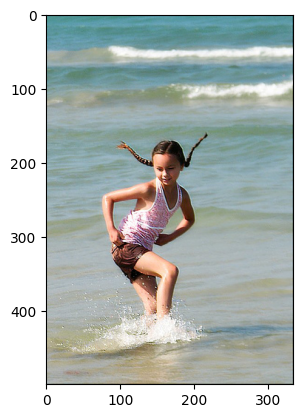

In [127]:
generate_caption("1053804096_ad278b25f1.jpg")

---------------------Actual---------------------

startseq മഞ്ഞുമലയിൽ ഒരു കൂടാരം സ്ഥാപിക്കുന്നു. endseq

startseq മഞ്ഞ് മൂടിയ തടാകത്തിലെ ഐസ് ഫിഷിംഗ് ടെന്റിൽ രണ്ട് പുരുഷന്മാർ പ്രവേശിക്കാൻ പോകുന്നു. endseq

startseq മഞ്ഞുമൂടിയ തടാകത്തിൽ നീല ഐസ് മത്സ്യബന്ധന കുടിൽ സ്ഥാപിക്കുന്ന രണ്ടുപേർ endseq

startseq "രണ്ട് പുരുഷന്മാർ ഒരു മഞ്ഞുകട്ടയിൽ നിൽക്കുന്നു നീല ടാർപ്പ് കൊണ്ട് പൊതിഞ്ഞ എന്തോ ഒന്ന് നോക്കുന്നു ." endseq

startseq മഞ്ഞുമൂടിയ പ്രതലത്തിൽ ഒരു നീല കൂടാര ഘടനയ്ക്ക് പുറത്ത് നിൽക്കുന്ന രണ്ട് ആളുകൾ endseq

--------------------Predicted--------------------

startseq മഞ്ഞുമൂടിയ പ്രതലത്തിൽ ഒരു കൂടാരം സ്ഥാപിക്കുന്നു endseq


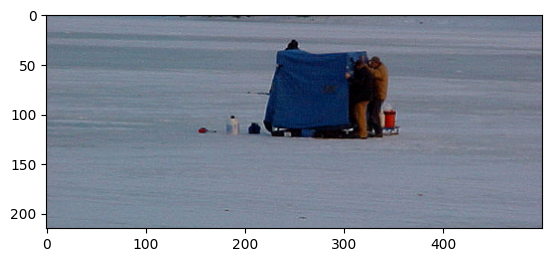

In [128]:
generate_caption("103205630_682ca7285b.jpg")

---------------------Actual---------------------

startseq കറുത്ത ഷർട്ട് ധരിച്ച ഒരു സുന്ദരിയായ കുതിരയും ഒരു സുന്ദരിയായ പെൺകുട്ടിയും വീപ്പയിലെ തീയിലേക്ക് നോക്കുന്നു. endseq

startseq ഒരു പെൺകുട്ടിയും അവളുടെ കുതിരയും തീയുടെ അരികിൽ നിൽക്കുന്നു. endseq

startseq തീയുടെ പിന്നിൽ കുതിരയുടെ ലീഡ് പിടിച്ചിരിക്കുന്ന ഒരു പെൺകുട്ടി endseq

startseq "ഒരു പുരുഷനും പെൺകുട്ടിയും രണ്ട് കുതിരകളും അടങ്ങിയ തീയുടെ അടുത്താണ്." endseq

startseq രണ്ട് ആളുകളും രണ്ട് കുതിരകളും തീ കാണുന്നത് endseq

--------------------Predicted--------------------

startseq തീയുടെ തീ ലീഡ് പിടിച്ചിരിക്കുന്ന ഒരു സുന്ദരിയായ സ്ത്രീ endseq


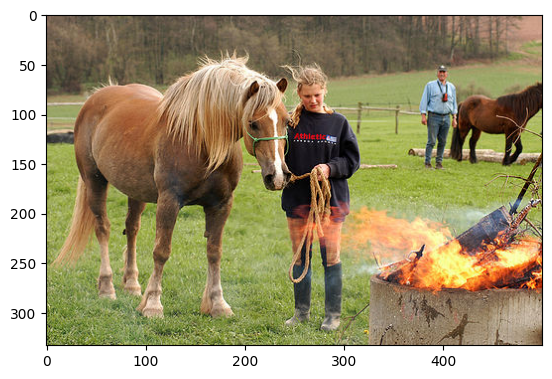

In [129]:
generate_caption("10815824_2997e03d76.jpg")

---------------------Actual---------------------

startseq "ഒരു വലിയ നദിയിൽ തുഴയുന്ന ഒരു പെൺകുട്ടി അവളുടെ പിന്നിൽ നിന്ന് കാണുന്നത് പോലെ." endseq

startseq നദിയിലൂടെ കയാക്കിംഗ് നടത്തുന്ന ഒരു സ്ത്രീ endseq

startseq ഒരു സ്ത്രീ നദിയിൽ ബോട്ട് തുഴയുന്നു. endseq

startseq തുഴയുന്ന ഒരു സ്ത്രീ endseq

startseq തുഴയുമായി ഒരു സ്ത്രീ വെള്ളത്തിന് മുകളിലുള്ള ബോട്ടിൽ ഇരിക്കുന്നു. endseq

--------------------Predicted--------------------

startseq ഒരു മനുഷ്യൻ തന്റെ ബോട്ടിൽ ബോട്ടിൽ നിന്ന് വെള്ളത്തിലേക്ക് ചാടുന്നു endseq


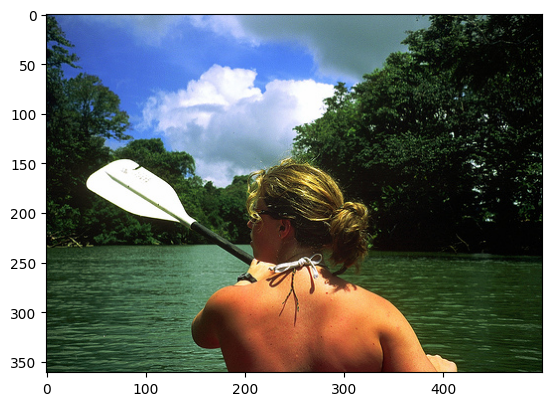

In [130]:
generate_caption("105342180_4d4a40b47f.jpg")

---------------------Actual---------------------

startseq വെറ്റ്‌സ്യൂട്ടിട്ട ഒരാൾ സമുദ്രത്തിൽ സർഫിംഗ് നടത്തുന്നു. endseq

startseq മഞ്ഞയും കറുപ്പും കലർന്ന വെറ്റ്-സ്യൂട്ട് ധരിച്ച ഒരു സർഫർ തിരമാലയിൽ നിന്ന് വീഴുന്നു. endseq

startseq വെള്ള സർഫ്ബോർഡിൽ തിരമാല പിടിക്കുന്ന ഒരു സർഫർ. endseq

startseq മഞ്ഞ ഷർട്ട് ധരിച്ച ഒരു യുവ സർഫർ തന്റെ വെള്ള ബോർഡിൽ സമുദ്രത്തിൽ തിരമാലയുമായി ഓടുന്നു. endseq

startseq മഞ്ഞ ഷർട്ട് ധരിച്ച ഒരു യുവാവ് തന്റെ സർഫ്ബോർഡിൽ നിന്ന് തിരമാലയിലേക്ക് പറക്കുന്നു. endseq

--------------------Predicted--------------------

startseq ഒരു സർഫർ തിരമാലയിൽ കയറുന്നു endseq


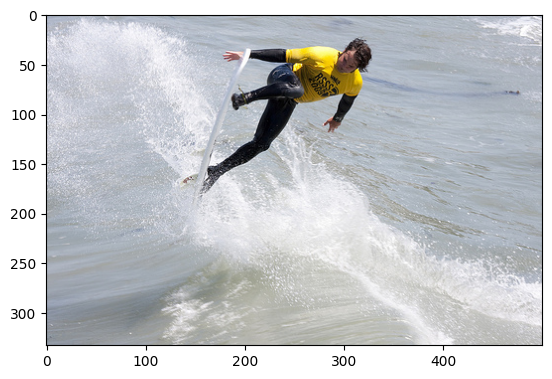

In [131]:
generate_caption("3668900592_a84b0c07db.jpg")